In [240]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import librosa
import librosa.display

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import pyprojroot
from pyprojroot.here import here

import tensorflow as tf
from tensorflow import keras
from keras import metrics
tf.get_logger().setLevel('INFO')

import sys
import os

# tf and keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers

from birdclef_raw_data_load import load_data

In [241]:
""" # get the current directory of the script
current_script_dir = os.path.abspath(os.getcwd())
print("1. " , current_script_dir)

# navigate one directory forward
next_dir = os.path.join(current_script_dir, '../../src')
print("2. " , next_dir)

# add next_dir to sys.path to make it the current working directory
sys.path.insert(0, next_dir)
print("3. ", sys.path )

 """


' # get the current directory of the script\ncurrent_script_dir = os.path.abspath(os.getcwd())\nprint("1. " , current_script_dir)\n\n# navigate one directory forward\nnext_dir = os.path.join(current_script_dir, \'../../src\')\nprint("2. " , next_dir)\n\n# add next_dir to sys.path to make it the current working directory\nsys.path.insert(0, next_dir)\nprint("3. ", sys.path )\n\n '

#Load raw data

In [242]:
#load raw data
birdclef_df = load_data()


In [243]:
!pwd

/Users/shikhasharma/github/DATASCI207_Bird_Sounds/notebooks/notebooks_ss


In [244]:
#birdclef_df = birdclef_raw_data_load.load_data()

species_counts = birdclef_df["primary_label"].value_counts()
print(f"{list(species_counts.index)[0]} Species has highest samples count :  ", max(species_counts) , 
      f"\n{list(species_counts.index)[-1]} Species has lowest samples count : ", min(species_counts))

top_species = list((species_counts[species_counts > 500]).index)
top_species_class = np.unique(list(birdclef_df[birdclef_df["primary_label"].isin(top_species)]["class_name"]))
print("top_species_class", top_species_class)



grekis Species has highest samples count :   990 
1139490 Species has lowest samples count :  2
top_species_class ['Aves']


In [245]:
## Load in spectrograph data and labels
data=np.load(here('data/processed/debug_birdclef2025_melspec_5sec_256_256.npy'),allow_pickle=True)
#data=np.load(here('data/processed/birdclef2025_melspec_5sec_256_256.npy'),allow_pickle=True)
graph_dict=data.item()

labels=pd.read_csv(here('data/raw/taxonomy.csv'))
count = len(graph_dict.keys())
print('count', count)
i=0
for key, array in graph_dict.items():
    while i < 5:
        print(f'Key: {key}, Shape: {array.shape}, Dtype: {array.dtype}')
        i += 1

count 1000
Key: 1139490-CSA36385, Shape: (256, 256), Dtype: float32
Key: 1139490-CSA36385, Shape: (256, 256), Dtype: float32
Key: 1139490-CSA36385, Shape: (256, 256), Dtype: float32
Key: 1139490-CSA36385, Shape: (256, 256), Dtype: float32
Key: 1139490-CSA36385, Shape: (256, 256), Dtype: float32


In [246]:
labels[labels['primary_label'] == '1139490']

,primary_label,inat_taxon_id,scientific_name,common_name,class_name
0,1139490,1139490,Ragoniella pulchella,Ragoniella pulchella,Insecta


In [247]:
graph_dict.keys()

dict_keys(['1139490-CSA36385', '1139490-CSA36389', '1192948-CSA36358', '1192948-CSA36366', '1192948-CSA36373', '1192948-CSA36388', '1194042-CSA18783', '1194042-CSA18794', '1194042-CSA18802', '126247-XC941297', '126247-iNat1109254', '126247-iNat146584', '126247-iNat320679', '126247-iNat888527', '126247-iNat888729', '1346504-CSA18784', '1346504-CSA18791', '1346504-CSA18792', '1346504-CSA18793', '1346504-CSA18803', '134933-XC941298', '134933-iNat1108984', '134933-iNat1160199', '134933-iNat859408', '135045-iNat1122209', '135045-iNat1207345', '135045-iNat1207347', '135045-iNat1208549', '135045-iNat1208550', '135045-iNat1208551', '135045-iNat1208552', '135045-iNat1208572', '135045-iNat327127', '135045-iNat48803', '1462711-CSA36371', '1462711-CSA36379', '1462711-CSA36390', '1462737-CSA36341', '1462737-CSA36369', '1462737-CSA36380', '1462737-CSA36381', '1462737-CSA36386', '1462737-CSA36391', '1462737-CSA36395', '1564122-CSA34195', '1564122-CSA34196', '1564122-CSA34197', '1564122-CSA34198', '15

In [248]:
## Create species to keys mapping for visualization 
species_to_keys = {}

for key in graph_dict: 
    species_name = key.split('-')[0] 
    if species_name:
        species_to_keys.setdefault(species_name, []).append(key)


In [249]:
species_to_keys.get('1192948')[0]

'1192948-CSA36358'

## EDA for processed spectrograms

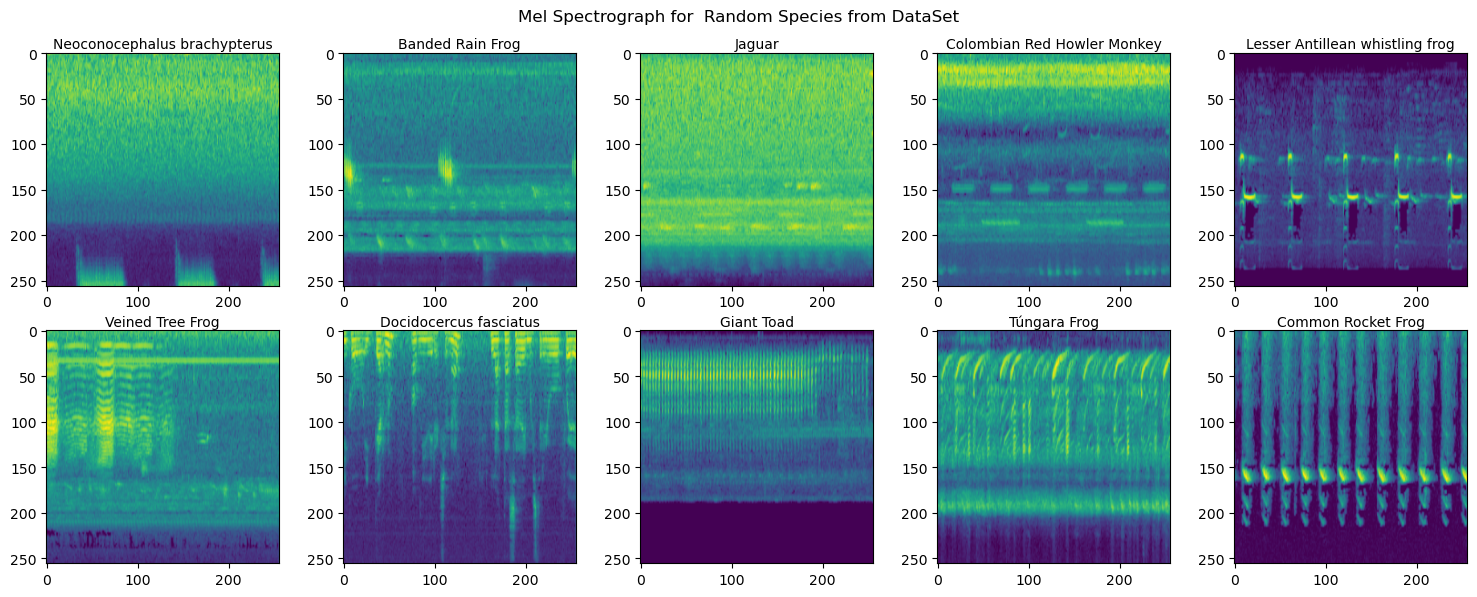

In [250]:

#Print random samples from the data

species_list = list(species_to_keys.keys())
rand_key_list = random.sample(species_list, 10 )

rows = 2
cols = 5
index = 0
fig, axes = plt.subplots(rows,cols, figsize=(cols*3,rows*3)) 
for row in np.arange(rows):
    for col in np.arange(cols):
        ax = axes[row,col]
        image_key = species_to_keys.get(rand_key_list[index])[0]
        #ax.imshow(graph_dict[image_key],cmap='plasma')
        ax.imshow(graph_dict[image_key])
        #ax.set_ylabel(image_key, fontsize=8)
        common_name = list(labels[labels["primary_label"] == image_key.split('-')[0]]["common_name"])
        #print("common_name:", common_name)
        ax.set_title(common_name[0], fontsize=10, va='center')
        index += 1
plt.suptitle("Mel Spectrograph for  Random Species from DataSet")  
plt.tight_layout()
#plt.subplots_adjust(top=0.9)
plt.show()

Observations: We observe the images for the same species look quite different and images across different species appear to be similar. Appears to be  difficult task to classifiy these images.

## Reading in data and preparing it for ML

In [ ]:
## Getting data in label/feature format

X = []
y = []

for key, img in graph_dict.items():
    species = key.split('-')[0]
    if species:
        #Add 1 color channel to grayscale image so we can use with CNN
        img = img.reshape(img.shape + (1,))
        X.append(img)
        y.append(species)

X = np.array(X)
y = np.array(y)

#Encode species labels in y
label_names = labels["primary_label"]
label_encoder = LabelEncoder() # Initialize encoder
y_encoded = label_encoder.fit_transform(y)
#print(y_encoded)
#One hot encode the y label
y_categorical = to_categorical(y_encoded, num_classes = len(np.unique(y_encoded)))
print("v_categorical shape:", y_categorical.shape)
y_categorical



#Set Random Seed
tf.random.set_seed(1234)
np.random.seed(1234)

# shuffle data
rng = np.random.default_rng(seed=1234)
shuffled_indices = rng.permutation(range(y.shape[0]))

# shuffle data #
##################
X = X[shuffled_indices]
y_categorical = y_categorical[shuffled_indices]

# create data splits (training, val, and test sets)
splits = (0.6,0.2,0.2)
splits = np.multiply(len(y), splits).astype(int)
X_train, X_val, X_test = np.split(X, [splits[0], splits[0]+splits[1]])
y_train, y_val, y_test = np.split(y_categorical, [splits[0], splits[0]+splits[1]])


print(f'X_train shape: {X_train.shape}')
print(f'Y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_val shape: {y_val.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')


(1000, 61)
X_train shape: (600, 256, 256, 1)
Y_train shape: (600, 61)
X_val shape: (200, 256, 256, 1)
y_val shape: (200, 61)
X_test shape: (200, 256, 256, 1)
y_test shape: (200, 61)


In [252]:
""" ## Flatten to prepare for model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1] * X_val.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])


print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape) """

' ## Flatten to prepare for model\nX_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])\nX_val = X_val.reshape(X_val.shape[0], X_val.shape[1] * X_val.shape[2])\nX_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])\n\n\nprint("X_train shape:", X_train.shape)\nprint("X_val shape:", X_val.shape)\nprint("X_test shape:", X_test.shape) '

## Baseline model for species

In [253]:
#Calculate species with most audio samples in training dataset
species_list = list(species_to_keys.keys())
count_list = []
for species in species_list:
    count_list.append(sum((y == species).astype(int)))
majority_species = species_list[np.argmax(count_list)]
minority_species = species_list[np.argmin(count_list)]
common_name_max = list(labels[labels["primary_label"] == majority_species]["common_name"])
class_name_max = list(labels[labels["primary_label"] == majority_species]["class_name"])
common_name_min = list(labels[labels["primary_label"] == minority_species]["common_name"])
class_name_min = list(labels[labels["primary_label"] == minority_species]["class_name"])

print(f"{common_name_max} Species from class {class_name_max} has highest samples count :  ", max(count_list) , 
      f"\n{common_name_min} Species from class {class_name_min} has lowest samples count : ", min(count_list))


['Common Raccoon'] Species from class ['Mammalia'] has highest samples count :   108 
['Ragoniella pulchella'] Species from class ['Insecta'] has lowest samples count :  2


In [254]:
## Creating a baseline model for species classification
y_baseline = (y == majority_species).astype(int)

## Building baseline
num_majority_species = np.sum(y_baseline == 1)
print(f"Number of samples with {majority_species} species : {num_majority_species}")

num_non_majority_species = np.sum(y_baseline== 0)
print(f"Number of samples with non-{majority_species} species: {num_non_majority_species}")

majority_label = 1 if num_majority_species > num_non_majority_species else 0
print(f"Majority label: {majority_label}")

majority_predictions = np.full(y_baseline.shape, majority_label)
accuracy = np.mean(majority_predictions == y_baseline)
print(f"Accuracy of majority label classifier: {accuracy:.4f}")

def log_loss(y_true, y_pred):
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

#Have to make baseline prediction be non zero so log function can work
baseline_pred = np.ones(y_baseline.shape[0])*(majority_label + 0.1 )

train_log_loss = log_loss(y_baseline, baseline_pred)
print(f"Log Loss on training data: {train_log_loss:.4f}")


Number of samples with 41663 species : 108
Number of samples with non-41663 species: 892
Majority label: 0
Accuracy of majority label classifier: 0.8920
Log Loss on training data: 0.3427


We observe that baseline model has very high accuracy due to unbalanced data. 

Simple Baseline CNN model

In [255]:
# define an instance of the early_stopping class
early_stopping = tf.keras.callbacks.EarlyStopping(
monitor='accuracy', 
verbose=1,
patience=5,
mode='max',
restore_best_weights=True)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 128, 128, 256)     4352      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 32, 32, 256)       0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 32, 32, 256)       0         
                                                                 
 flatten_5 (Flatten)         (None, 262144)            0         
                                                                 
 dense_5 (Dense)             (None, 61)                15990845  
                                                                 
Total params: 15995197 (61.02 MB)
Trainable params: 15995197 (61.02 MB)
Non-trainable params: 0 (0.00 Byte)
____________

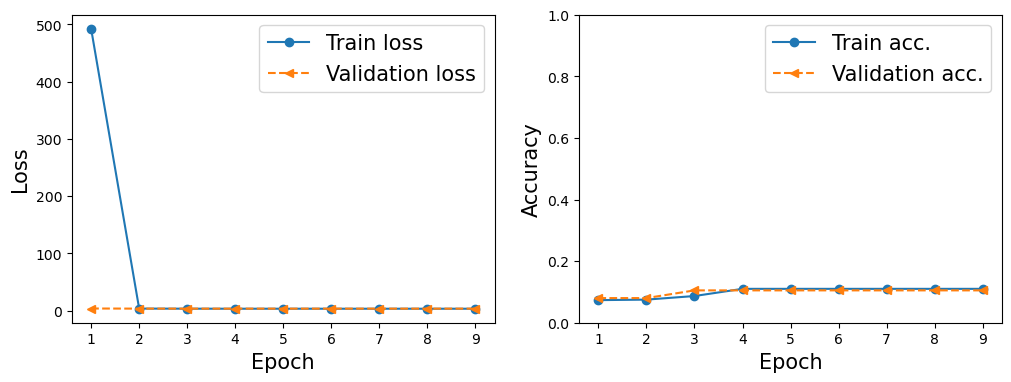

19/19 [==============================] - 1s 65ms/step - loss: 3.3694 - accuracy: 0.1100

Train Acc. 11.00%
7/7 [==============================] - 0s 52ms/step - loss: 3.5201 - accuracy: 0.1050

Val Acc. 10.50%

Percent Diff in Acc. 4.55%


In [259]:
tf.random.set_seed(1234)
np.random.seed(1234)

# initialize model
model_tf = tf.keras.Sequential()

# add convolutional layer
model_tf.add(layers.Conv2D(
    filters=256,
    kernel_size=(4,4),
    strides=(2,2),
    padding='same',
    data_format="channels_last",
    name='conv_1',
    activation='relu'))



# add max pooling layer 
### YOUR CODE HERE ###
model_tf.add(layers.MaxPooling2D((4,4)))

# add dropout layer
### YOUR CODE HERE ###
model_tf.add(layers.Dropout(rate=0.5))

# add a flattening layer
### YOUR CODE HERE ###
model_tf.add(layers.Flatten())

# add the classification layer
### YOUR CODE HERE ###
model_tf.add(layers.Dense(y_train.shape[1], activation='softmax'

))

# build and compile model
model_tf.build(input_shape=(None, 256,256,1))
model_tf.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.1),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy']) 

# print model_tf summary
### YOUR CODE HERE ###
print(model_tf.summary())

# train model_tf on (X_train, y_train) data
### YOUR CODE HERE ###
history = model_tf.fit(
    X_train, 
    y_train,
    validation_data=(X_val,y_val), 
    callbacks=[early_stopping],
    epochs=20)

# plot loss curves
### YOUR CODE HERE ###
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
ax.set_ylim(0,1)
plt.show()

# evaluate the accuracy of model_tf on (X_train, y_train) and (X_val, y_val)
### YOUR CODE HERE ###
train_results = model_tf.evaluate(X_train, y_train)
print('\nTrain Acc. {:.2f}%'.format(train_results[1]*100))

val_results = model_tf.evaluate(X_val, y_val)
print('\nVal Acc. {:.2f}%'.format(val_results[1]*100))

percent_diff = 100*(train_results[1] - val_results[1])/train_results[1]
print('\nPercent Diff in Acc. {:.2f}%'.format(percent_diff))

The simplae baseline model has very low accuracy. Need to add additional hidden layers. 
Hyperparameter tuning plan:


|Model|# Conv|Filters|Stride|MaxPool|Dropout|L.R.|Optimizer|Train Acc.|Val Acc.|% Diff|
|-|-|-|-|-|-|-|-|-|-|-|
|Baseline|1|256|(2,2)|(4,4)|0.5|0.1|Adam||||
|1|2|(256,128)|(2,2)|(4,4)|0.5|0.1|Adam||||
|2|3|(256,128,64)|(2,2)|(4,4)|0.5|0.1|Adam||||
|3|4|(256,128,64,32)|(2,2)|(4,4)|0.5|0.1|Adam||||
|4|5|(256,128,64,32,16)|(2,2)|(4,4)|0.5|0.1|Adam||||
|5|5|(256,128,64,32,16)|(3,3)|(4,4)|0.5|0.1|Adam||||
|6|5|(256,128,64,32,16)|(4,4)|(4,4)|0.5|0.1|Adam||||
|7|5|(256,128,64,32,16)|(4,4)|(8,8)|0.5|0.1|Adam||||
|8|5|(256,128,64,32,16)|(4,4)|(8,8)|0.4|0.1|Adam||||
|9|5|(256,128,64,32,16)|(4,4)|(8,8)|0.3|0.1|Adam||||
|10|5|(256,128,64,32,16)|(4,4)|(8,8)|0.3|0.01|Adam||||
|11|5|(256,128,64,32,16)|(4,4)|(8,8)|0.3|0.001|Adam||||
|12|5|(256,128,64,32,16)|(4,4)|(8,8)|0.3|0.001|Adamax||||
|13|5|(256,128,64,32,16)|(4,4)|(8,8)|0.3|0.001|SGD||||
|14|5|(256,128,64,32,16)|(4,4)|(8,8)|0.3|0.001|RMSProp||||
|15|5|(256,128,64,32,16)|(4,4)|(8,8)|0.3|0.001|Adagrad||||
|16|5|(256,128,64,32,16)|(4,4)|(8,8)|0.3|0.001|Adadelta||||

Model has very low accuracy. Need to add additional layers. 